# Initialisation ,lecture des fichiers  et jointure

In [1]:
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV 
from sklearn.preprocessing import LabelEncoder

pd.options.display.max_columns = None
pd.options.display.max_rows = None
# pd.options.display.float_format = '{:.2f}'.format 


from sklearn.feature_selection import VarianceThreshold

In [2]:
weather = pd.read_csv ('Data/weather_out.csv', sep = ',')

print ('premiere date :' ,weather['aaaammjj'].min())
print ('derniere date :' ,weather['aaaammjj'].max())

premiere date : 2015-01-01
derniere date : 2019-12-31


In [3]:
weather.head()

,region,aaaammjj,annee,mois,joursem,jour,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
0,11,2015-01-01,2015,1,3,1,0.4000,84.250,30.6250,30.625,3.5875,1.8500,0.0,0.0,0.0,0.0,0.0
1,11,2015-01-02,2015,1,4,2,4.0625,88.375,73.7500,73.750,6.1250,3.2625,0.0,0.2,0.4,0.8,1.2
2,11,2015-01-03,2015,1,5,3,6.9250,93.125,92.0625,97.625,9.2750,4.5625,0.8,3.0,6.0,10.4,12.2
3,11,2015-01-04,2015,1,6,4,4.3250,83.750,72.5000,72.500,4.0500,2.2625,0.2,1.2,2.4,6.4,21.8
4,11,2015-01-05,2015,1,0,5,-0.3875,95.250,77.1250,77.125,2.3875,1.1375,0.0,0.0,0.0,0.0,0.0


In [4]:
elec = pd.read_csv ('Data/rte_jour_regions.csv', sep = ';')
elec.head()

print ('premiere date :' ,elec['Date'].min())
print ('derniere date :' ,elec['Date'].max())

premiere date : 2013-01-01
derniere date : 2021-11-30


In [5]:
df = pd.merge(elec, weather, how='left', left_on = ['Code INSEE région','Date'], right_on =['region','aaaammjj'])
df.head()



,Date,Jour_semaine,Annee,Mois,Code INSEE région,Région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Production totale (MW),region,aaaammjj,annee,mois,joursem,jour,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
0,2013-01-01,1,2013,2013-01,11,Île-de-France,399392,32478,0,340,100,0,0,6333,360051,39251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,1,2013,2013-01,24,Centre-Val de Loire,103218,4236,438965,12262,357,1596,0,1150,-355429,458566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,1,2013,2013-01,27,Bourgogne-Franche-Comté,110467,10996,0,3737,57,5493,-5,596,89409,20874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,1,2013,2013-01,28,Normandie,155860,20427,384145,6648,179,693,0,2523,-258889,414615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,1,2013,2013-01,32,Hauts-de-France,253829,38592,211166,25444,308,46,0,3130,-25001,278686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je n'ai aucune idée de pourquoi la jointure génère un isna (On perd un enregistrement mais je ne vois pas pourquoi) 

In [6]:
df.isna().sum()

Date                          0
Jour_semaine                  0
Annee                         0
Mois                          0
Code INSEE région             0
Région                        0
Consommation (MW)             0
Thermique (MW)                0
Nucléaire (MW)                0
Eolien (MW)                   0
Solaire (MW)                  0
Hydraulique (MW)              0
Pompage (MW)                  0
Bioénergies (MW)              0
Ech. physiques (MW)           0
Production totale (MW)        0
region                    17161
aaaammjj                  17161
annee                     17161
mois                      17161
joursem                   17161
jour                      17161
temp                      17161
humidite                  17161
nebulosite                17161
nebulosite2               17161
rafale_periode            17161
vitesse_vent              17161
pluie_1h                  17161
pluie_3h                  17161
pluie_6h                  17161
pluie_12

Les Nan correspondent aux périodes que l'on a pas en commun. On peut donc supprimer les informations

In [7]:
df = df.dropna()

Renommage des colonnes

In [8]:
df.head(2)

,Date,Jour_semaine,Annee,Mois,Code INSEE région,Région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Production totale (MW),region,aaaammjj,annee,mois,joursem,jour,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
8760,2015-01-01,3,2015,2015-01,11,Île-de-France,483411,18868,0,133,205,265,0,6036,457899,25507,11.0,2015-01-01,2015.0,1.0,3.0,1.0,0.400,84.25,30.6250,30.62500,3.58750,1.85,0.0,0.0,0.0,0.0,0.0
8761,2015-01-01,3,2015,2015-01,24,Centre-Val de Loire,135296,3685,513855,4398,905,1086,0,1826,-390436,525755,24.0,2015-01-01,2015.0,1.0,3.0,1.0,0.225,83.75,25.9375,31.40625,2.64375,1.40,0.0,0.0,0.0,0.0,0.0


In [9]:
df = df.rename(columns = {'Eolien (MW)': 'eolien', 'Solaire (MW)': 'solaire', 'Consommation (MW)':'conso_totale',
                          'Nucléaire (MW)':'nucleaire','Pompage (MW)':'pompage','Bioénergies (MW)':'bioenergies',
                          'Thermique (MW)':'thermique','Hydraulique (MW)':'hydraulique',
             'Ech. physiques (MW)':'ech_total', 'Production totale (MW)':"prod_totale"})

In [10]:
df.head(2)

,Date,Jour_semaine,Annee,Mois,Code INSEE région,Région,conso_totale,thermique,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech_total,prod_totale,region,aaaammjj,annee,mois,joursem,jour,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
8760,2015-01-01,3,2015,2015-01,11,Île-de-France,483411,18868,0,133,205,265,0,6036,457899,25507,11.0,2015-01-01,2015.0,1.0,3.0,1.0,0.400,84.25,30.6250,30.62500,3.58750,1.85,0.0,0.0,0.0,0.0,0.0
8761,2015-01-01,3,2015,2015-01,24,Centre-Val de Loire,135296,3685,513855,4398,905,1086,0,1826,-390436,525755,24.0,2015-01-01,2015.0,1.0,3.0,1.0,0.225,83.75,25.9375,31.40625,2.64375,1.40,0.0,0.0,0.0,0.0,0.0


In [11]:
df_region = df 

# Niveau national 

## Préprocessing des données 
Séparation entre les données numérique et les données catégorielles   

Centrer réduire les variables numériques 

Dummies des variables catégorielles

In [12]:
# df_num = df [['conso_totale','nucleaire','eolien','solaire','pompage','bioenergies','thermique','hydraulique',
#              'ech_total','ech_sup0','ech_inf0','temp','humidite','nebulosite','nebulosite2','rafale_periode'
#              ,'vitesse_vent','pluie_1h','pluie_3h','pluie_6h','pluie_12h','pluie_24h'] ]
df_num = df [['conso_totale','nucleaire','eolien','solaire','pompage','bioenergies','thermique','hydraulique',
             'ech_total','temp','humidite','nebulosite','nebulosite2','rafale_periode'
             ,'vitesse_vent','pluie_1h','pluie_3h','pluie_6h','pluie_12h','pluie_24h'] ]
#  On l'aisse aaaammjj à l'écart car il est impossible de faire un pd.dummy dessus
#  On va aussi laisser le jour du mois pour la meme raison. Cependant on conservera dans un premier temps les jours de la semaine
#  car ils ont une importances sur la consommation


df_obj = df[['region','annee','mois','joursem']]
df_obj = df_obj.astype ({'region' : int ,'annee' : int,'mois' : int ,'joursem'  : int})
df_obj = df_obj.astype ({'region' : str ,'annee' : str,'mois' : str ,'joursem'  : str})



-- On controle qu'on a bien pris en compte toutes les données 

In [13]:
print ('shape (df ) :',df.shape) 
print ('shape (df_num) :',df_num.shape) 
print ('shape (df_obj) :',df_obj.shape) 


shape (df ) : (21911, 33)
shape (df_num) : (21911, 20)
shape (df_obj) : (21911, 4)


In [14]:
std_scaler =  StandardScaler() 

std_scaler.fit (df_num) 

# df_num = pd.DataFrame (std_scaler.transform (df_num), columns = ['conso_totale','nucleaire','eolien','solaire','pompage','bioenergies','thermique','hydraulique',
#              'ech_total','ech_sup0','ech_inf0','temp','humidite','nebulosite','nebulosite2','rafale_periode'
#              ,'vitesse_vent','pluie_1h','pluie_3h','pluie_6h','pluie_12h','pluie_24h'])
df_num = df [['conso_totale','nucleaire','eolien','solaire','pompage','bioenergies','thermique','hydraulique',
             'ech_total','temp','humidite','nebulosite','nebulosite2','rafale_periode'
             ,'vitesse_vent','pluie_1h','pluie_3h','pluie_6h','pluie_12h','pluie_24h'] ]

In [15]:
df_num.shape

(21911, 20)

In [16]:
df_num.head()

,conso_totale,nucleaire,eolien,solaire,pompage,bioenergies,thermique,hydraulique,ech_total,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
8760,483411,0,133,205,0,6036,18868,265,457899,0.400000,84.2500,30.62500,30.62500,3.58750,1.85000,0.0,0.0,0.0,0.0,0.0
8761,135296,513855,4398,905,0,1826,3685,1086,-390436,0.225000,83.7500,25.93750,31.40625,2.64375,1.40000,0.0,0.0,0.0,0.0,0.0
8762,137886,0,2279,480,0,1034,4961,3696,125447,-1.862500,93.0000,100.18750,100.18750,3.62500,1.77500,0.0,0.0,0.0,0.0,0.0
8763,196708,498774,13068,314,0,2574,17534,680,-336238,2.278125,85.0625,85.78125,88.90625,8.23750,5.41875,0.0,0.2,0.4,0.6,1.4
8764,303668,255608,42765,349,0,5301,38290,96,-38746,1.868750,80.5625,51.87500,58.43750,7.31875,4.54375,0.0,0.0,0.0,0.0,0.0


In [17]:
df_obj = pd.get_dummies (df_obj)
df_obj.head()

,region_11,region_24,region_27,region_28,region_32,region_44,region_52,region_53,region_75,region_76,region_84,region_93,annee_2015,annee_2016,annee_2017,annee_2018,annee_2019,mois_1,mois_10,mois_11,mois_12,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,joursem_0,joursem_1,joursem_2,joursem_3,joursem_4,joursem_5,joursem_6
8760,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8761,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8762,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8763,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8764,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
df = pd.merge(df_num, df_obj, how='inner', left_index  = True, right_index = True)
df.head()

,conso_totale,nucleaire,eolien,solaire,pompage,bioenergies,thermique,hydraulique,ech_total,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h,region_11,region_24,region_27,region_28,region_32,region_44,region_52,region_53,region_75,region_76,region_84,region_93,annee_2015,annee_2016,annee_2017,annee_2018,annee_2019,mois_1,mois_10,mois_11,mois_12,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,joursem_0,joursem_1,joursem_2,joursem_3,joursem_4,joursem_5,joursem_6
8760,483411,0,133,205,0,6036,18868,265,457899,0.400000,84.2500,30.62500,30.62500,3.58750,1.85000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8761,135296,513855,4398,905,0,1826,3685,1086,-390436,0.225000,83.7500,25.93750,31.40625,2.64375,1.40000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8762,137886,0,2279,480,0,1034,4961,3696,125447,-1.862500,93.0000,100.18750,100.18750,3.62500,1.77500,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8763,196708,498774,13068,314,0,2574,17534,680,-336238,2.278125,85.0625,85.78125,88.90625,8.23750,5.41875,0.0,0.2,0.4,0.6,1.4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8764,303668,255608,42765,349,0,5301,38290,96,-38746,1.868750,80.5625,51.87500,58.43750,7.31875,4.54375,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
df.shape

(21911, 56)

In [20]:
df.isna().sum()

conso_totale      0
nucleaire         0
eolien            0
solaire           0
pompage           0
bioenergies       0
thermique         0
hydraulique       0
ech_total         0
temp              0
humidite          0
nebulosite        0
nebulosite2       0
rafale_periode    0
vitesse_vent      0
pluie_1h          0
pluie_3h          0
pluie_6h          0
pluie_12h         0
pluie_24h         0
region_11         0
region_24         0
region_27         0
region_28         0
region_32         0
region_44         0
region_52         0
region_53         0
region_75         0
region_76         0
region_84         0
region_93         0
annee_2015        0
annee_2016        0
annee_2017        0
annee_2018        0
annee_2019        0
mois_1            0
mois_10           0
mois_11           0
mois_12           0
mois_2            0
mois_3            0
mois_4            0
mois_5            0
mois_6            0
mois_7            0
mois_8            0
mois_9            0
joursem_0         0


In [21]:
del df_obj 
del df_num

##  Régression linéaire à une seule variable 

Dans un premier temps on veut faire l'exercice entre consommation et variables du climat   
On supprime donc toutes les colonnes de production 
On supprime aussi certaines colones catégorielles car on ne pourra pas faire de prédictions qui aient un sens (prédire la conso totale // 2015 ???) 

In [22]:
df.columns.values


array(['conso_totale', 'nucleaire', 'eolien', 'solaire', 'pompage',
       'bioenergies', 'thermique', 'hydraulique', 'ech_total', 'temp',
       'humidite', 'nebulosite', 'nebulosite2', 'rafale_periode',
       'vitesse_vent', 'pluie_1h', 'pluie_3h', 'pluie_6h', 'pluie_12h',
       'pluie_24h', 'region_11', 'region_24', 'region_27', 'region_28',
       'region_32', 'region_44', 'region_52', 'region_53', 'region_75',
       'region_76', 'region_84', 'region_93', 'annee_2015', 'annee_2016',
       'annee_2017', 'annee_2018', 'annee_2019', 'mois_1', 'mois_10',
       'mois_11', 'mois_12', 'mois_2', 'mois_3', 'mois_4', 'mois_5',
       'mois_6', 'mois_7', 'mois_8', 'mois_9', 'joursem_0', 'joursem_1',
       'joursem_2', 'joursem_3', 'joursem_4', 'joursem_5', 'joursem_6'],
      dtype=object)

In [23]:
df.head()

,conso_totale,nucleaire,eolien,solaire,pompage,bioenergies,thermique,hydraulique,ech_total,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h,region_11,region_24,region_27,region_28,region_32,region_44,region_52,region_53,region_75,region_76,region_84,region_93,annee_2015,annee_2016,annee_2017,annee_2018,annee_2019,mois_1,mois_10,mois_11,mois_12,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,joursem_0,joursem_1,joursem_2,joursem_3,joursem_4,joursem_5,joursem_6
8760,483411,0,133,205,0,6036,18868,265,457899,0.400000,84.2500,30.62500,30.62500,3.58750,1.85000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8761,135296,513855,4398,905,0,1826,3685,1086,-390436,0.225000,83.7500,25.93750,31.40625,2.64375,1.40000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8762,137886,0,2279,480,0,1034,4961,3696,125447,-1.862500,93.0000,100.18750,100.18750,3.62500,1.77500,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8763,196708,498774,13068,314,0,2574,17534,680,-336238,2.278125,85.0625,85.78125,88.90625,8.23750,5.41875,0.0,0.2,0.4,0.6,1.4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8764,303668,255608,42765,349,0,5301,38290,96,-38746,1.868750,80.5625,51.87500,58.43750,7.31875,4.54375,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
Analyse_rl_2var = df[['conso_totale','temp', 'humidite', 'nebulosite', 'nebulosite2',
       'rafale_periode', 'vitesse_vent', 'pluie_1h', 'pluie_3h',
       'pluie_6h', 'pluie_12h', 'pluie_24h', 'region_11', 'region_24',
       'region_27', 'region_28', 'region_32', 'region_44', 'region_52',
       'region_53', 'region_75', 'region_76', 'region_84', 'region_93',
       'mois_1', 'mois_10', 'mois_11', 'mois_12', 'mois_2',
       'mois_3', 'mois_4', 'mois_5', 'mois_6', 'mois_7', 'mois_8',
       'mois_9', 'joursem_0', 'joursem_1', 'joursem_2', 'joursem_3',
       'joursem_4', 'joursem_5', 'joursem_6']]

Analyse_rl_2var.head()

,conso_totale,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h,region_11,region_24,region_27,region_28,region_32,region_44,region_52,region_53,region_75,region_76,region_84,region_93,mois_1,mois_10,mois_11,mois_12,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,joursem_0,joursem_1,joursem_2,joursem_3,joursem_4,joursem_5,joursem_6
8760,483411,0.400000,84.2500,30.62500,30.62500,3.58750,1.85000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8761,135296,0.225000,83.7500,25.93750,31.40625,2.64375,1.40000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8762,137886,-1.862500,93.0000,100.18750,100.18750,3.62500,1.77500,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8763,196708,2.278125,85.0625,85.78125,88.90625,8.23750,5.41875,0.0,0.2,0.4,0.6,1.4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8764,303668,1.868750,80.5625,51.87500,58.43750,7.31875,4.54375,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Etude des correlations pour ce faire une idée des liens existants entre les variables 

<AxesSubplot:>

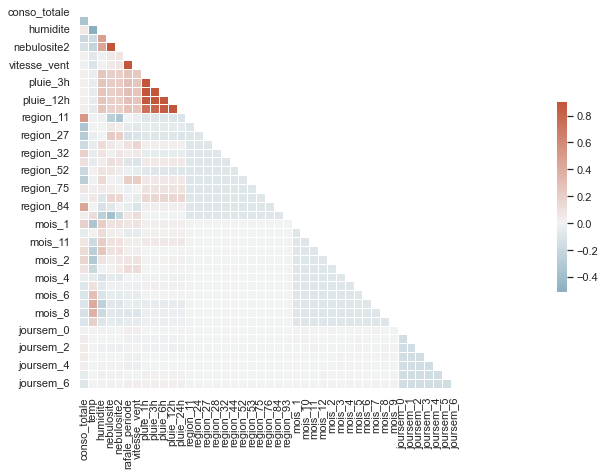

In [25]:
sns.set_theme(style="white")
# Compute the correlation matrix

corr = Analyse_rl_2var.corr() 

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(35,7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, axes = ax)
 

ON NE VOIT PAS TOUTES LES VARIABLES  ..... Pourquoi ? 

In [26]:
corr.head()

,conso_totale,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h,region_11,region_24,region_27,region_28,region_32,region_44,region_52,region_53,region_75,region_76,region_84,region_93,mois_1,mois_10,mois_11,mois_12,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,joursem_0,joursem_1,joursem_2,joursem_3,joursem_4,joursem_5,joursem_6
conso_totale,1.000000,-0.354426,0.046771,-0.196341,-0.127708,0.010722,-0.015928,0.013368,0.011883,0.011709,0.012418,0.014803,0.509981,-0.335118,-0.290328,-0.185614,0.180950,0.102092,-0.199693,-0.279477,0.064128,-0.028988,0.439245,0.022748,0.190168,-0.048984,0.069394,0.122496,0.161669,0.077999,-0.031297,-0.094701,-0.102926,-0.100137,-0.138374,-0.100951,0.011341,0.034250,0.038406,0.038570,0.027091,-0.054889,-0.094719
temp,-0.354426,1.000000,-0.517130,-0.183908,-0.227014,-0.081748,-0.112805,-0.040221,-0.044132,-0.048108,-0.053593,-0.064916,-0.009360,-0.003582,-0.033216,-0.046592,-0.055568,-0.052659,0.011788,-0.009853,0.032200,0.055677,-0.005066,0.116223,-0.350909,0.012016,-0.184676,-0.273543,-0.313494,-0.197700,-0.059782,0.094882,0.291188,0.408053,0.372245,0.192110,0.004540,-0.001063,-0.003136,-0.004419,0.000511,0.001269,0.002293
humidite,0.046771,-0.517130,1.000000,0.471057,0.438996,-0.013876,0.012139,0.251800,0.263554,0.265189,0.262263,0.248484,-0.022230,-0.001654,-0.000614,0.126666,0.079821,0.039891,0.082974,0.139148,0.047221,-0.088212,-0.138478,-0.264533,0.203218,0.119847,0.215660,0.257844,0.076279,-0.009909,-0.136169,-0.069499,-0.113073,-0.256415,-0.193136,-0.093363,-0.009013,-0.006213,-0.010495,-0.000837,0.004337,0.014408,0.007797
nebulosite,-0.196341,-0.183908,0.471057,1.000000,0.950399,0.053362,0.042737,0.196309,0.203001,0.202225,0.197795,0.186354,-0.270176,0.063611,0.225793,0.054334,0.013906,0.108915,0.066489,0.005345,0.036782,0.164554,-0.081257,-0.388239,0.084501,0.030765,0.075496,0.081830,0.028128,0.009264,-0.060447,-0.009388,-0.043258,-0.076695,-0.072763,-0.047382,0.002134,-0.006016,-0.017917,-0.006138,0.007839,0.010983,0.009088
nebulosite2,-0.127708,-0.227014,0.438996,0.950399,1.000000,0.069647,0.066553,0.200238,0.206168,0.205308,0.200131,0.188365,-0.339534,0.029216,0.198283,0.016461,0.071866,0.078243,0.031021,-0.016260,0.003684,0.147142,-0.007979,-0.212094,0.107398,0.017980,0.095799,0.102572,0.055400,0.043844,-0.072331,-0.024391,-0.062152,-0.098373,-0.094139,-0.070913,0.001464,-0.004531,-0.018707,-0.005706,0.007772,0.012014,0.007664


On voit que la consommation est très correlée à la température 

### création d'un jeu d'entraitement et de test 


In [27]:
features = Analyse_rl_2var.drop ('conso_totale',axis = 1) 
target = Analyse_rl_2var['conso_totale']

X_train , X_test, y_train,y_test = train_test_split (features,  target, test_size = 0.2) 

X_train.head()

,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h,region_11,region_24,region_27,region_28,region_32,region_44,region_52,region_53,region_75,region_76,region_84,region_93,mois_1,mois_10,mois_11,mois_12,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,joursem_0,joursem_1,joursem_2,joursem_3,joursem_4,joursem_5,joursem_6
11218,25.075000,51.218750,62.187500,62.187500,5.631250,2.546875,0.0,0.2,0.4,0.4,0.4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
28213,13.875000,78.312500,96.250000,96.250000,7.200000,3.456250,2.4,8.1,11.1,12.5,36.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
24878,20.275000,58.500000,89.062500,89.062500,3.625000,1.662500,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10767,15.715625,78.093750,64.484375,64.484375,6.468750,3.943750,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9993,16.371429,56.035714,69.285714,85.000000,5.717857,1.957143,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


### Regression à 2 variables 

In [28]:
#  Paramètrage de la boucle de régression 

lr = LinearRegression()

#  On selectionne une colonne par groupe de colonne :  Pluie_24h uniquement, vitesse_vent,  ainsi que la seule région qui semble
Liste_variables  = ['temp', 'humidite', 'nebulosite', 'nebulosite2','vitesse_vent', 'pluie_24h']

score = dict()

==================>  regression entre Production totale et temp 


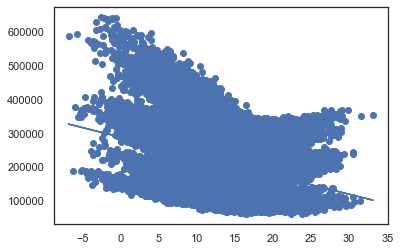

      Score du model (R2) : 0.12561066803909693
         rmse train : 95734.0380737826
         rmse test :  96290.3332882083
==================>  regression entre Production totale et humidite 


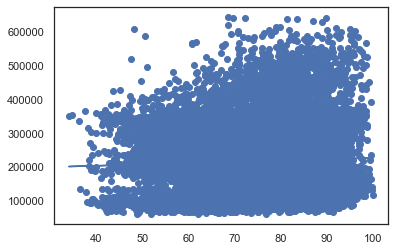

      Score du model (R2) : 0.0019975325402350474
         rmse train : 102277.4190702727
         rmse test :  102826.47005551345
==================>  regression entre Production totale et nebulosite 


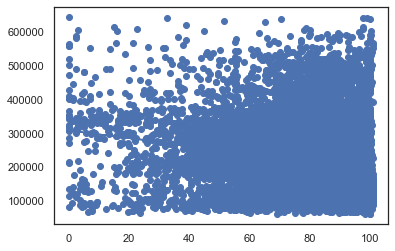

      Score du model (R2) : 0.03901540912674517
         rmse train : 100362.66032517745
         rmse test :  101070.08579594406
==================>  regression entre Production totale et nebulosite2 


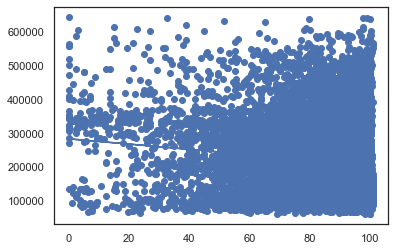

      Score du model (R2) : 0.016674822500830744
         rmse train : 101522.55342867738
         rmse test :  102210.35965496955
==================>  regression entre Production totale et vitesse_vent 


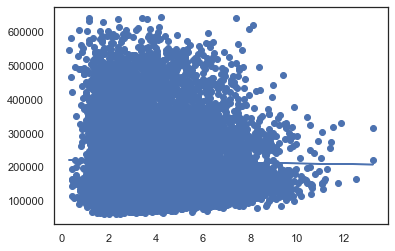

      Score du model (R2) : 0.00027782194928238635
         rmse train : 102365.50094454439
         rmse test :  102968.76415219302
==================>  regression entre Production totale et pluie_24h 


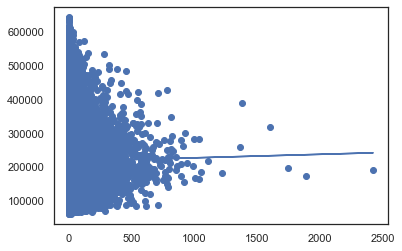

      Score du model (R2) : 0.00011050867367512485
         rmse train : 102374.06651961664
         rmse test :  102948.13371344318


In [29]:
for variable in Liste_variables:
    print (f"==================>  regression entre Production totale et {variable} ")
    lr.fit(X_train[[variable]],y_train)
    plt.scatter(X_train[[variable]],y_train)
    plt.plot(X_train[[variable]],lr.coef_*X_train[[variable]]+lr.intercept_)
    plt.show()
    
    print (f"      Score du model (R2) : {lr.score (X_train[[variable]],y_train)}")
    
    pred_train = lr.predict (X_train[[variable]])
    pred_test =  lr.predict(X_test[[variable]])
    
    print('         rmse train :', np.sqrt(mean_squared_error(y_train, pred_train)))
    print('         rmse test : ', np.sqrt(mean_squared_error(y_test, pred_test)))



### Conclusion Regression linéaire à 2 variables : 

Il n'est pas possible d'expliquer la consommation d'electricité en fonction d'une seule variable. 

## Régression à plusieurs variables 
On va utiliser Lasso (CV) afin d'éliminer automatiquement les variables qui n'ont pas de liens 

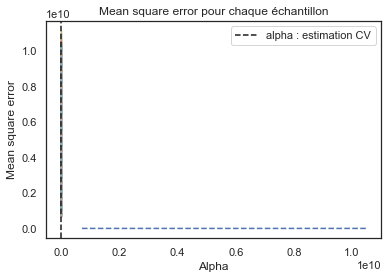

In [30]:
from sklearn.linear_model import LassoCV 

model_lasso = LassoCV ( cv= 10,n_alphas = 100)
model_lasso.fit (X_train,y_train)

alphas = model_lasso.alphas_ 

plt.plot (alphas,model_lasso.mse_path_ ,'-.')
plt.plot (model_lasso.mse_path_.mean(axis=1), alphas, '--')
plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();



In [31]:
print ('score :' , model_lasso.score(X_test,y_test))

score : 0.937250672055063


### Vérification de l'overfitting du model

In [32]:
lasso_pred_train = model_lasso.predict (X_train)
lasso_pred_test =  model_lasso.predict (X_test)
print (mean_squared_error(lasso_pred_train ,y_train) ) 
print (mean_squared_error(lasso_pred_test ,y_test) ) 


645384833.1989694
665378227.5101833


Le modèle ne semble pas faire d'overfitting

### Les variables utilisées 

In [33]:
coeffs = list(model_lasso.coef_)
feats = list(X_train.columns)
# feats.insert(0, 'intercept')
var_coef= pd.DataFrame({'valeur_estimée': coeffs}, index=feats)

In [34]:
var_coef.sort_values(by='valeur_estimée', key= abs, ascending = False)[0:50]

,valeur_estimée
region_11,162969.243461
region_84,134431.152280
region_24,-114803.155618
region_27,-103103.638963
region_53,-96768.982314
region_28,-68096.934299
region_52,-67270.812577
region_32,42387.332008
joursem_6,-27448.286625
mois_1,23000.704068


### Conclusion Régression linéaire à plusieurs variables  
Le score du modele est plutot bon !  Mais qu'est ce que cela veut dire de prédire une consommation sans lien avec le temps ? 

Prédiction en prenant en compte le TEMPS 


PCA pour le choix des variables

# Analyse par Région    

### fonctions

In [35]:
def dataviz_corr(df): 
    sns.set_theme(style="white")
    # Compute the correlation matrix

    corr = df.corr() 

# Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(9,9))

# Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [36]:
def suppression_variance_nulle (X_train,X_test,liste_colonnes): 
    sel = VarianceThreshold(threshold = 0.01 )
    sel.fit (X_train)
    X_train_sel = sel.transform (X_train)
    X_test_sel = sel.transform (X_test)
 
  
    print ( "liste_colonnes.head()" )
    print ( liste_colonnes.head() )
    liste_colonnes = liste_colonnes[sel.get_support()]
    # print ('lc',type(liste_colonnes))
    return X_train_sel,X_test_sel, liste_colonnes 


In [37]:
def boucle_analyse_2X2 (X_train,X_text,liste_variables) : 

    
    for variable in X_train: 
        print (f"==================>  regression entre Production totale et {variable} ")
        lr.fit(X_train[[variable]],y_train)
        plt.scatter(X_train[[variable]],y_train)
        plt.plot(X_train[[variable]],lr.coef_*X_train[[variable]]+lr.intercept_)
        plt.show()
    
        print (f"      Score du model (R2) : {lr.score (X_train[[variable]],y_train)}")
    
        pred_train = lr.predict (X_train[[variable]])
        pred_test =  lr.predict(X_test[[variable]])
    
        print('         rmse train :', np.sqrt(mean_squared_error(y_train, pred_train)))
        print('         rmse test : ', np.sqrt(mean_squared_error(y_test, pred_test)))

## Préprocessing des données 
(Centrer réduire mais pas de dummies sur les régions )

In [38]:
df_region.head()

,Date,Jour_semaine,Annee,Mois,Code INSEE région,Région,conso_totale,thermique,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech_total,prod_totale,region,aaaammjj,annee,mois,joursem,jour,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
8760,2015-01-01,3,2015,2015-01,11,Île-de-France,483411,18868,0,133,205,265,0,6036,457899,25507,11.0,2015-01-01,2015.0,1.0,3.0,1.0,0.400000,84.2500,30.62500,30.62500,3.58750,1.85000,0.0,0.0,0.0,0.0,0.0
8761,2015-01-01,3,2015,2015-01,24,Centre-Val de Loire,135296,3685,513855,4398,905,1086,0,1826,-390436,525755,24.0,2015-01-01,2015.0,1.0,3.0,1.0,0.225000,83.7500,25.93750,31.40625,2.64375,1.40000,0.0,0.0,0.0,0.0,0.0
8762,2015-01-01,3,2015,2015-01,27,Bourgogne-Franche-Comté,137886,4961,0,2279,480,3696,0,1034,125447,12450,27.0,2015-01-01,2015.0,1.0,3.0,1.0,-1.862500,93.0000,100.18750,100.18750,3.62500,1.77500,0.0,0.0,0.0,0.0,0.0
8763,2015-01-01,3,2015,2015-01,28,Normandie,196708,17534,498774,13068,314,680,0,2574,-336238,532944,28.0,2015-01-01,2015.0,1.0,3.0,1.0,2.278125,85.0625,85.78125,88.90625,8.23750,5.41875,0.0,0.2,0.4,0.6,1.4
8764,2015-01-01,3,2015,2015-01,32,Hauts-de-France,303668,38290,255608,42765,349,96,0,5301,-38746,342409,32.0,2015-01-01,2015.0,1.0,3.0,1.0,1.868750,80.5625,51.87500,58.43750,7.31875,4.54375,0.0,0.0,0.0,0.0,0.0


In [39]:
df_region = pd.merge(elec, weather, how='left', left_on = ['Code INSEE région','Date'], right_on =['region','aaaammjj'])

df_region = df_region.dropna(axis= 0)

df_region.head()

,Date,Jour_semaine,Annee,Mois,Code INSEE région,Région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Production totale (MW),region,aaaammjj,annee,mois,joursem,jour,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
8760,2015-01-01,3,2015,2015-01,11,Île-de-France,483411,18868,0,133,205,265,0,6036,457899,25507,11.0,2015-01-01,2015.0,1.0,3.0,1.0,0.400000,84.2500,30.62500,30.62500,3.58750,1.85000,0.0,0.0,0.0,0.0,0.0
8761,2015-01-01,3,2015,2015-01,24,Centre-Val de Loire,135296,3685,513855,4398,905,1086,0,1826,-390436,525755,24.0,2015-01-01,2015.0,1.0,3.0,1.0,0.225000,83.7500,25.93750,31.40625,2.64375,1.40000,0.0,0.0,0.0,0.0,0.0
8762,2015-01-01,3,2015,2015-01,27,Bourgogne-Franche-Comté,137886,4961,0,2279,480,3696,0,1034,125447,12450,27.0,2015-01-01,2015.0,1.0,3.0,1.0,-1.862500,93.0000,100.18750,100.18750,3.62500,1.77500,0.0,0.0,0.0,0.0,0.0
8763,2015-01-01,3,2015,2015-01,28,Normandie,196708,17534,498774,13068,314,680,0,2574,-336238,532944,28.0,2015-01-01,2015.0,1.0,3.0,1.0,2.278125,85.0625,85.78125,88.90625,8.23750,5.41875,0.0,0.2,0.4,0.6,1.4
8764,2015-01-01,3,2015,2015-01,32,Hauts-de-France,303668,38290,255608,42765,349,96,0,5301,-38746,342409,32.0,2015-01-01,2015.0,1.0,3.0,1.0,1.868750,80.5625,51.87500,58.43750,7.31875,4.54375,0.0,0.0,0.0,0.0,0.0


In [40]:
df_region = df_region.rename(columns = {'Eolien (MW)': 'eolien', 'Solaire (MW)': 'solaire', 'Consommation (MW)':'conso_totale',
                          'Nucléaire (MW)':'nucleaire','Pompage (MW)':'pompage','Bioénergies (MW)':'bioenergies',
                          'Thermique (MW)':'thermique','Hydraulique (MW)':'hydraulique',
             'Ech. physiques (MW)':'ech_total', 'Production totale (MW)':"prod_totale"})


df_num = df_region [['conso_totale','temp','humidite','nebulosite','nebulosite2'
             ,'vitesse_vent','pluie_24h'] ]
#  On l'aisse aaaammjj à l'écart car il est impossible de faire un pd.dummy dessus
#  On va aussi laisser le jour du mois pour la meme raison. Cependant on conservera dans un premier temps les jours de la semaine
#  car ils ont une importances sur la consommation

# Apres réflexion il est absolument inutile d'encoder le mois et le jour il le sont déjà ! 

########################################### QUESTION  #########################################################################  #
# Par contre doivent ils être centré reduit avec le reste des données ?  pour les mettre à la meme échelle que les autres ? 
########################################### QUESTION  #########################################################################  #
df_obj = df_region[['annee','mois','joursem']]
df_obj.head()
df_obj = df_obj.astype ({'annee' : int,'mois' : int ,'joursem'  : int})
# df_obj = df_obj.astype ({'annee' : str,'mois' : str ,'joursem'  : str})



In [41]:
# 
# df_obj = pd.get_dummies (df_obj)

label_enc = LabelEncoder()
df_obj['annee'] = label_enc.fit_transform (df_region['annee'])
df_obj.head()
 

,annee,mois,joursem
8760,0,1,3
8761,0,1,3
8762,0,1,3
8763,0,1,3
8764,0,1,3


 Centrer réduire 

In [42]:
std_scaler =  StandardScaler() 

std_scaler.fit (df_num) 

df_num = pd.DataFrame (std_scaler.transform (df_num), columns = ['conso_totale','temp','humidite','nebulosite','nebulosite2'
             ,'vitesse_vent','pluie_24h'])


In [43]:
df_regiontemp = pd.merge(df_num, df_obj, how='inner', left_index  = True, right_index = True)
df_regiontemp.head()


,conso_totale,temp,humidite,nebulosite,nebulosite2,vitesse_vent,pluie_24h,annee,mois,joursem
8760,3.280423,-2.495653,1.633636,1.028569,0.931402,-1.699669,-0.474406,0,1,3
8761,-0.580783,-2.468523,1.770792,1.031961,0.935048,-1.945223,-0.474406,0,1,3
8762,-0.665310,-2.249545,1.918499,1.035353,0.938693,-1.722690,-0.474406,0,1,3
8763,0.032548,-2.317370,1.654737,0.465478,0.326298,-1.751466,-0.474406,0,1,3
8764,1.224429,-2.423952,1.918499,1.011609,0.911354,-1.753384,-0.457003,0,1,3


In [44]:

df_region = pd.merge (df_region['region'],df_regiontemp, how='inner', left_index  = True, right_index = True)

df_region.head()

,region,conso_totale,temp,humidite,nebulosite,nebulosite2,vitesse_vent,pluie_24h,annee,mois,joursem
8760,11.0,3.280423,-2.495653,1.633636,1.028569,0.931402,-1.699669,-0.474406,0,1,3
8761,24.0,-0.580783,-2.468523,1.770792,1.031961,0.935048,-1.945223,-0.474406,0,1,3
8762,27.0,-0.665310,-2.249545,1.918499,1.035353,0.938693,-1.722690,-0.474406,0,1,3
8763,28.0,0.032548,-2.317370,1.654737,0.465478,0.326298,-1.751466,-0.474406,0,1,3
8764,32.0,1.224429,-2.423952,1.918499,1.011609,0.911354,-1.753384,-0.457003,0,1,3


## Boucle sur les régions 



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  11.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


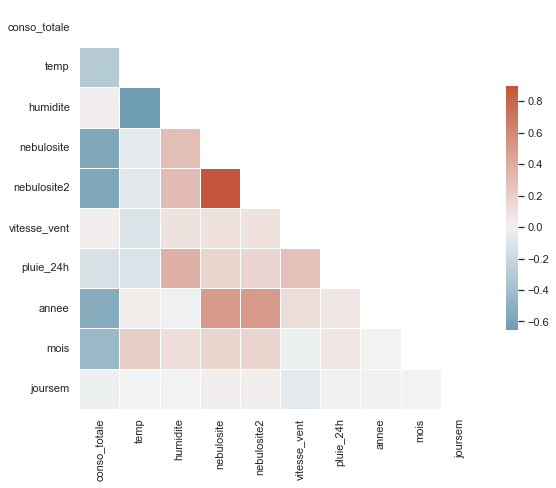

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8760      3.280423 -2.495653  1.633636    1.028569     0.931402     -1.699669   

      pluie_24h  annee  mois  joursem  
8760  -0.474406      0     1        3  
331
         rmse train : 1.173295051989939
         rmse test :  1.1792687152999672
332
         rmse train : 1.2324994648352
         rmse test :  1.2410612378446662
333
         rmse train : 1.011062381564938
         rmse test :  1.001961102787155
334
         rmse train : 1.0102440149984813
         rmse test :  1.0067121722516137
335
         rmse train : 1.232487958462705
         rmse test :  1.2432888570947227
336
         rmse train : 1.2245454505813513
         rmse test :  1.2217230746216488
337
         rmse train : 1.031643953541483
         rmse test :  1.0764254429130538
338
         rmse train : 1.1114731658913208
         rmse test :  1.1087165757136161
339
         rmse train : 1.2331159609320104
         rmse test :  1.24248140

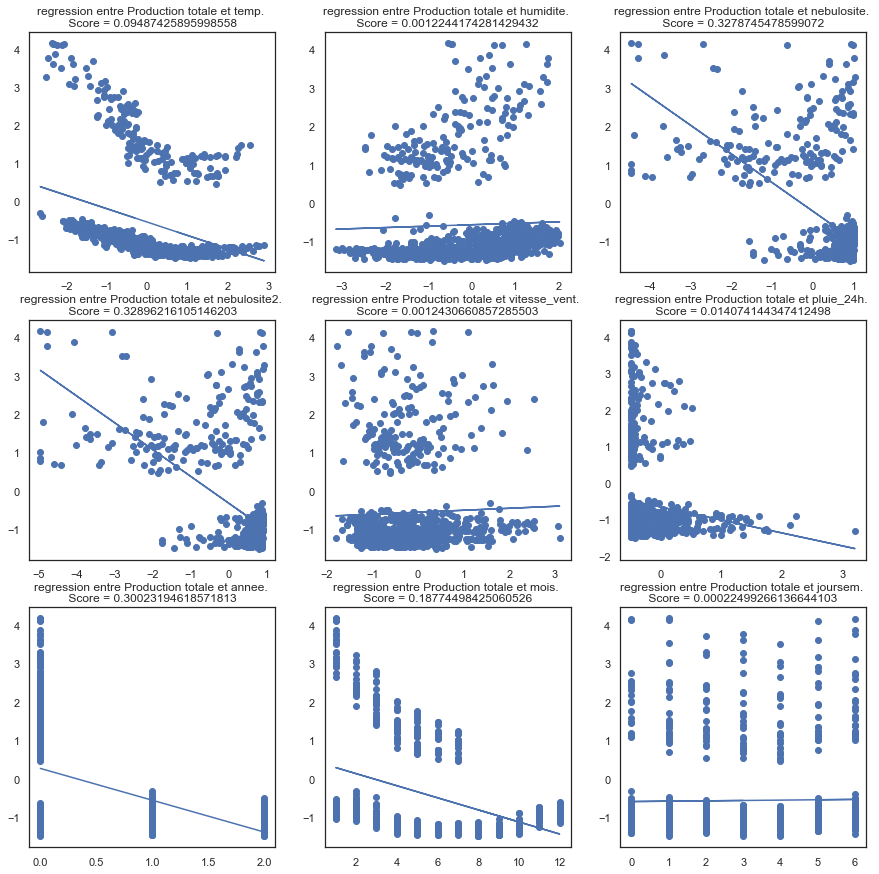

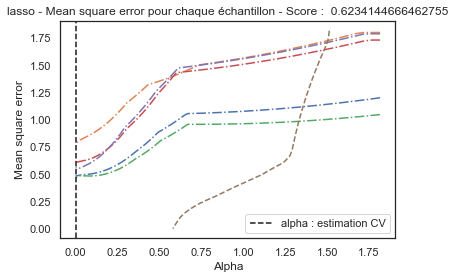



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  24.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


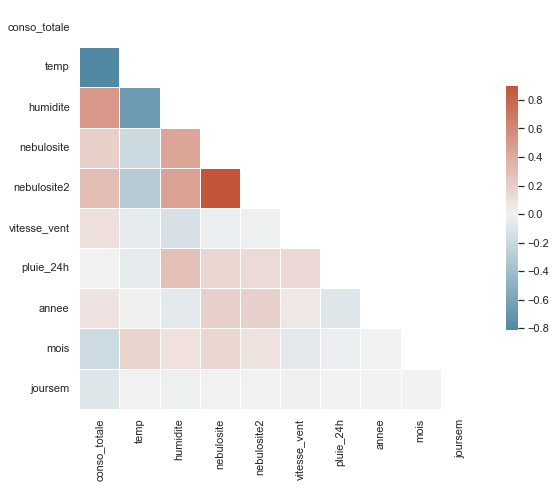

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8761     -0.580783 -2.468523  1.770792    1.031961     0.935048     -1.945223   

      pluie_24h  annee  mois  joursem  
8761  -0.474406      0     1        3  
331
         rmse train : 0.14220707682168965
         rmse test :  0.14245633970255758
332
         rmse train : 0.20942484045209292
         rmse test :  0.2159293306708756
333
         rmse train : 0.23922810060791877
         rmse test :  0.24317121648221918
334
         rmse train : 0.2334926057766207
         rmse test :  0.23322913400516804
335
         rmse train : 0.24356147750875023
         rmse test :  0.24426418148879533
336
         rmse train : 0.24491427505297214
         rmse test :  0.24471565698407577
337
         rmse train : 0.24375898705435625
         rmse test :  0.2453009992757264
338
         rmse train : 0.24060076698278474
         rmse test :  0.24074302553645752
339
         rmse train : 0.24354246503526444
         r

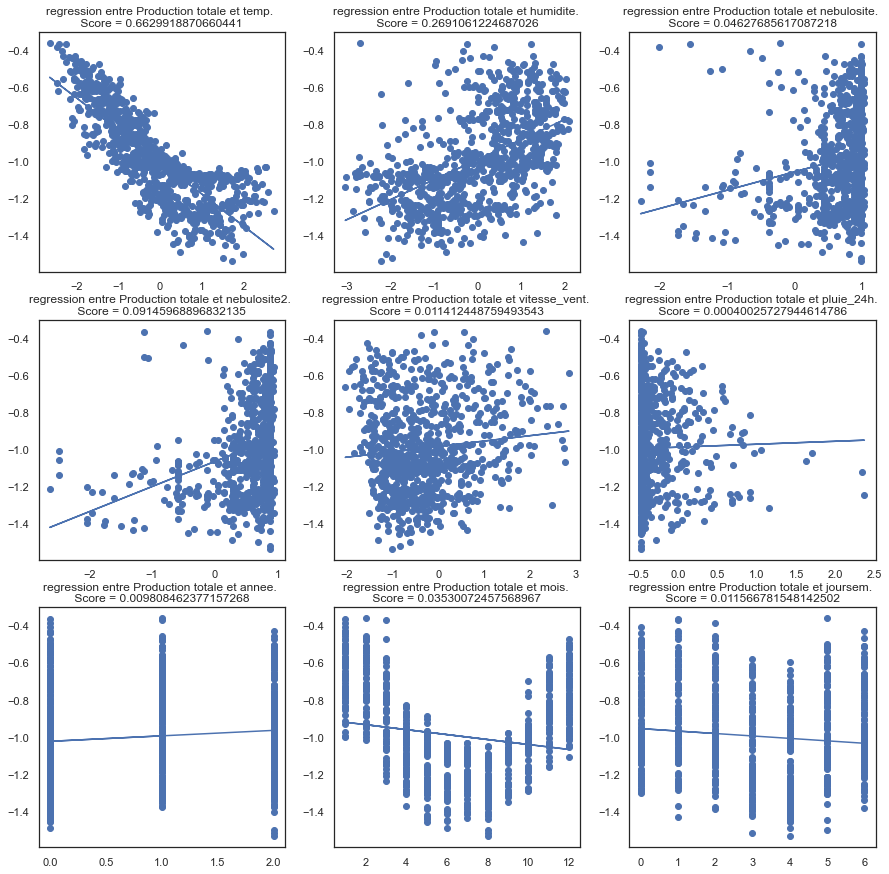

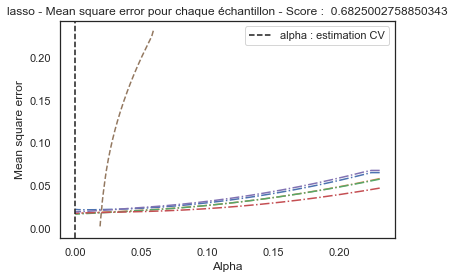



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  27.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


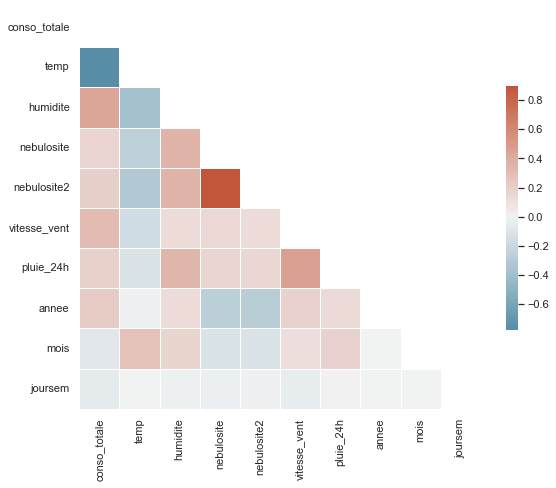

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8762      -0.66531 -2.249545  1.918499    1.035353     0.938693      -1.72269   

      pluie_24h  annee  mois  joursem  
8762  -0.474406      0     1        3  
331
         rmse train : 0.20527770407465684
         rmse test :  0.1994389946969058
332
         rmse train : 0.29647306948053775
         rmse test :  0.28169282896948206
333
         rmse train : 0.324629671134225
         rmse test :  0.3090503101387848
334
         rmse train : 0.32268043913604555
         rmse test :  0.3071203234311109
335
         rmse train : 0.31310822908015457
         rmse test :  0.2984343310424477
336
         rmse train : 0.3217075212175742
         rmse test :  0.3130645136377263
337
         rmse train : 0.32101362684288093
         rmse test :  0.30881248737565686
338
         rmse train : 0.3273565558411982
         rmse test :  0.31519375206882144
339
         rmse train : 0.3274603166409043
         rmse tes

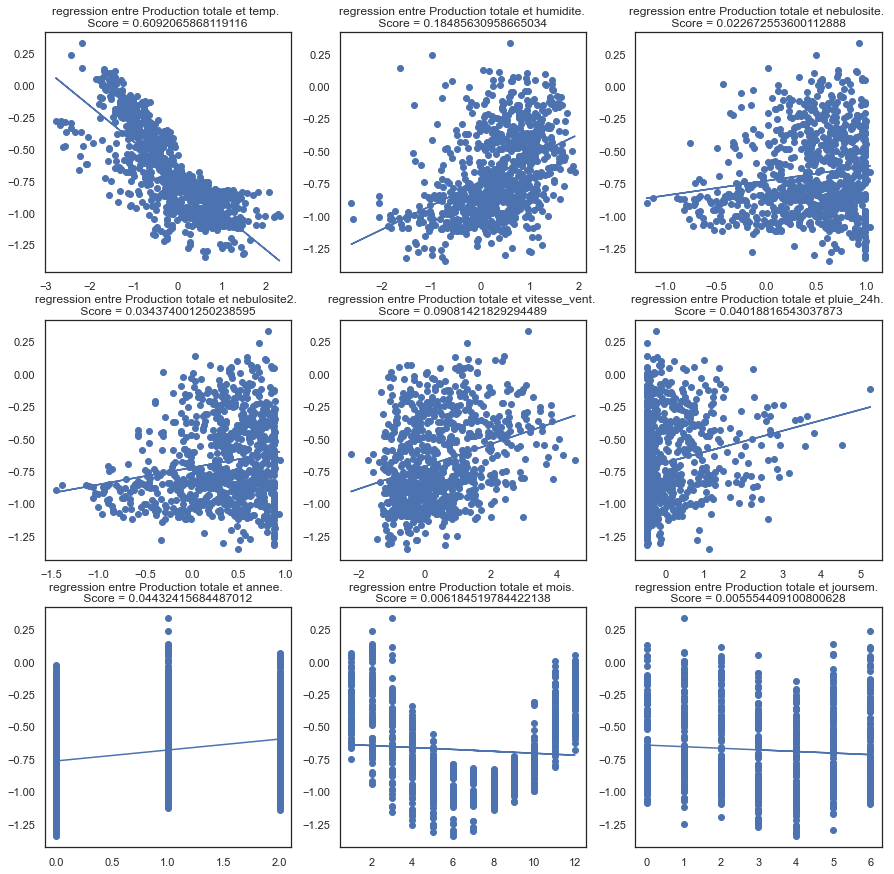

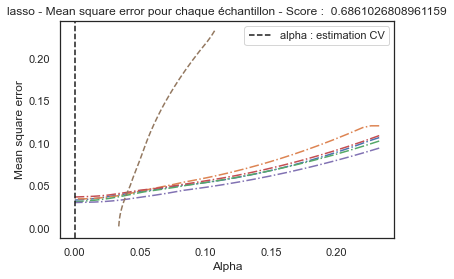



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  28.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


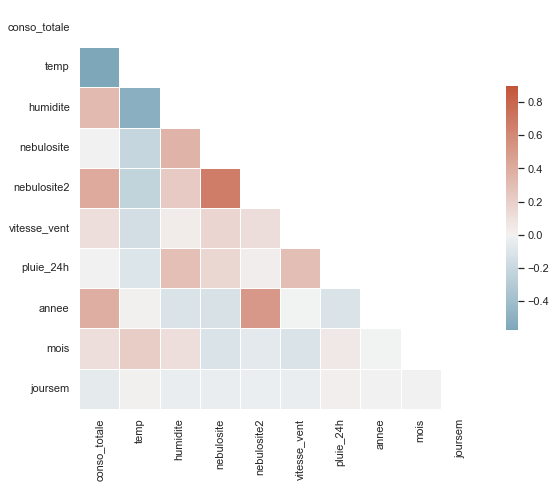

      conso_totale     temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8763      0.032548 -2.31737  1.654737    0.465478     0.326298     -1.751466   

      pluie_24h  annee  mois  joursem  
8763  -0.474406      0     1        3  
331
         rmse train : 0.5238030219462345
         rmse test :  0.5349373824923297
332
         rmse train : 0.6111247735618337
         rmse test :  0.6046881344378782
333
         rmse train : 0.6417940416452514
         rmse test :  0.6525000781105338
334
         rmse train : 0.5833681278501246
         rmse test :  0.5970565855491317
335
         rmse train : 0.6363801898788588
         rmse test :  0.6549626606720587
336
         rmse train : 0.641606334100338
         rmse test :  0.6544843636486697
337
         rmse train : 0.5916063737119948
         rmse test :  0.5980346941830292
338
         rmse train : 0.6379256604918602
         rmse test :  0.6497369137552413
339
         rmse train : 0.6410766326753206
         rmse test :  0.649

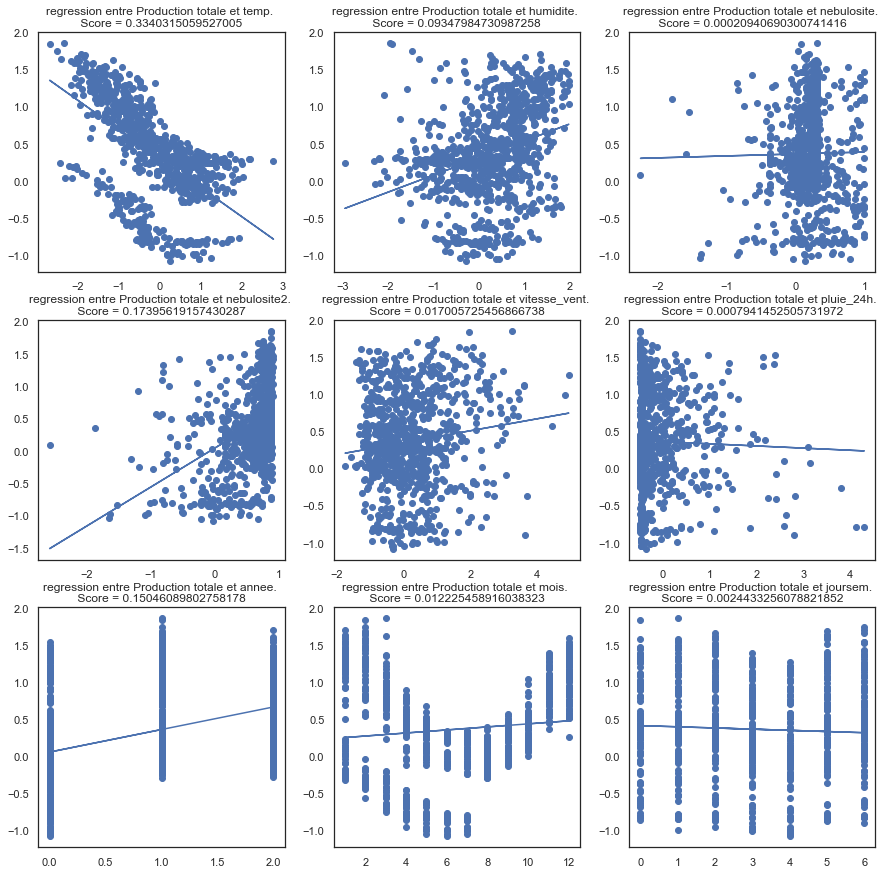

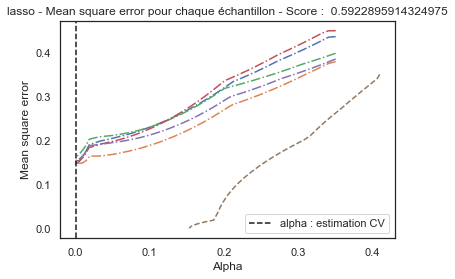



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  32.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


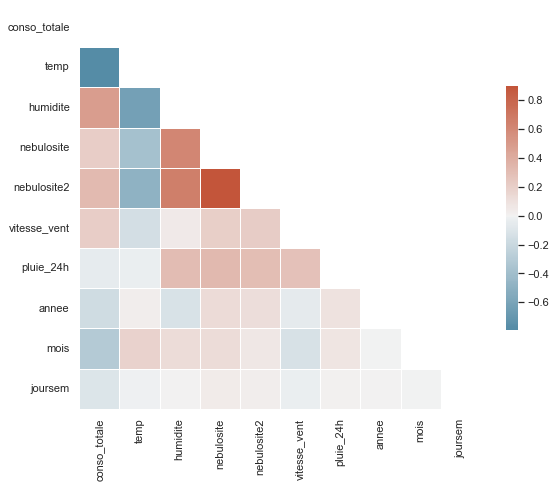

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8764      1.224429 -2.423952  1.918499    1.011609     0.911354     -1.753384   

      pluie_24h  annee  mois  joursem  
8764  -0.457003      0     1        3  
331
         rmse train : 0.2808445857636872
         rmse test :  0.2986631195111188
332
         rmse train : 0.4080846363616335
         rmse test :  0.41601868303294975
333
         rmse train : 0.45433766198605335
         rmse test :  0.4697815897196359
334
         rmse train : 0.43925732618599084
         rmse test :  0.456993566810321
335
         rmse train : 0.4566333731432896
         rmse test :  0.4591243375033875
336
         rmse train : 0.4661068785633914
         rmse test :  0.4689033745418964
337
         rmse train : 0.46226099872132875
         rmse test :  0.4557160711750929
338
         rmse train : 0.44772497566904856
         rmse test :  0.43181499742173635
339
         rmse train : 0.4637230686079379
         rmse test 

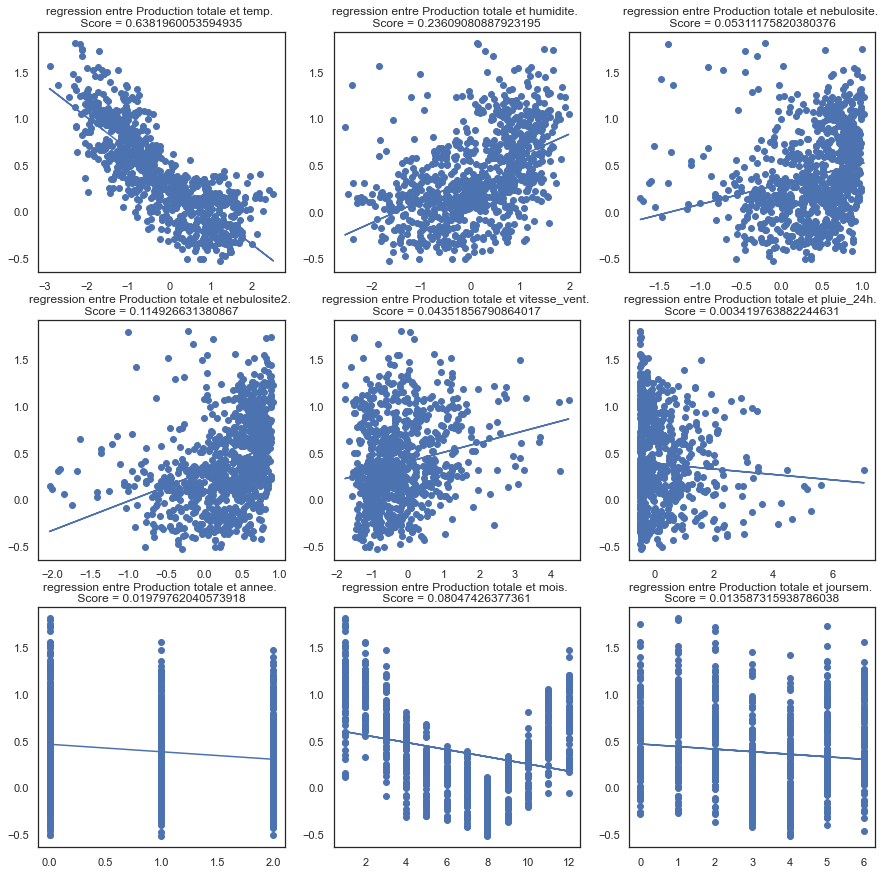

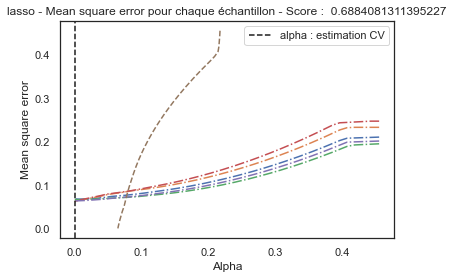



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  44.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


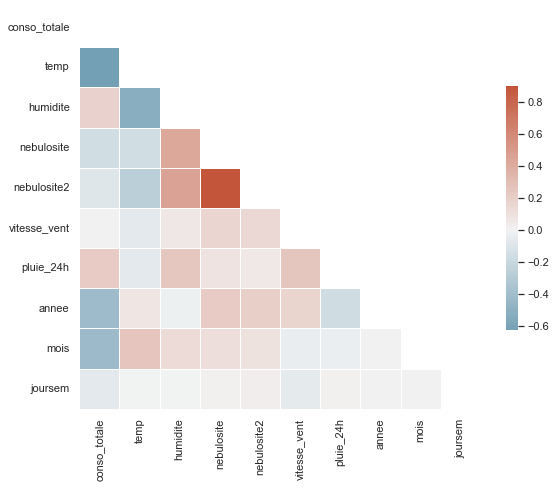

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8765      0.840397 -2.499142  1.836205     0.32301     0.173199     -1.632142   

      pluie_24h  annee  mois  joursem  
8765  -0.470539      0     1        3  
331
         rmse train : 0.4469299449549396
         rmse test :  0.399242138378801
332
         rmse train : 0.5560018331058307
         rmse test :  0.5404650267788782
333
         rmse train : 0.5559693403015874
         rmse test :  0.5477334220876418
334
         rmse train : 0.5622217496298334
         rmse test :  0.5512774025684429
335
         rmse train : 0.5650276657697842
         rmse test :  0.5501662913916221
336
         rmse train : 0.550261657494173
         rmse test :  0.538203655213393
337
         rmse train : 0.5092363723236488
         rmse test :  0.508875616452884
338
         rmse train : 0.514986195772387
         rmse test :  0.47138922250770654
339
         rmse train : 0.5633502416263494
         rmse test :  0.5516

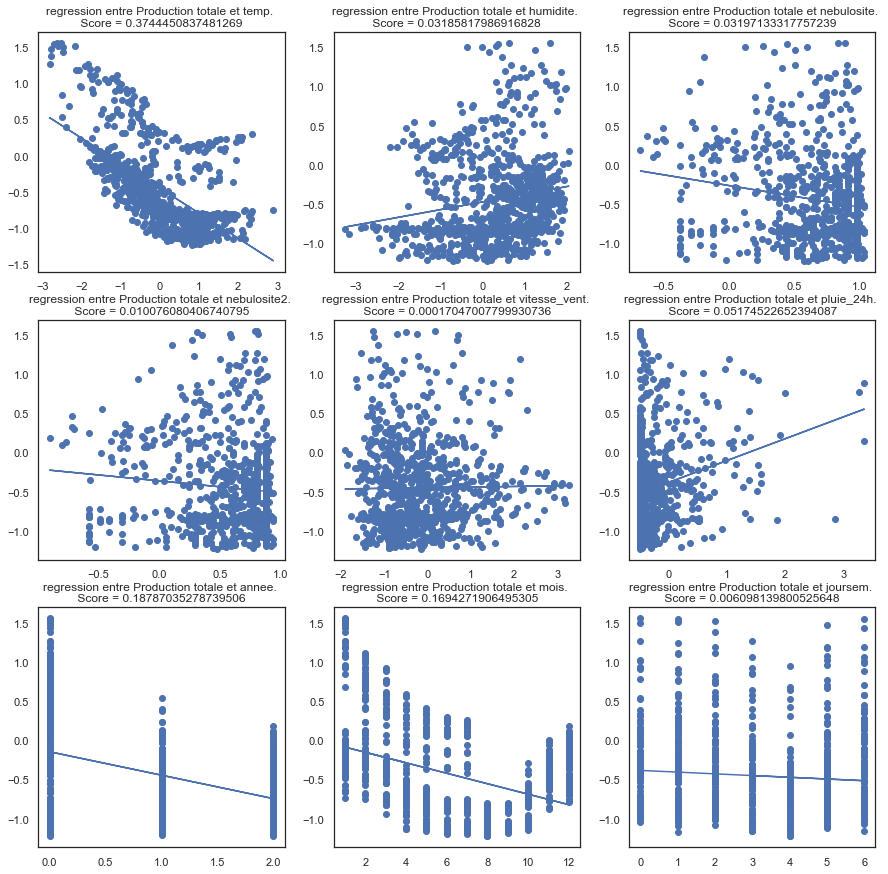

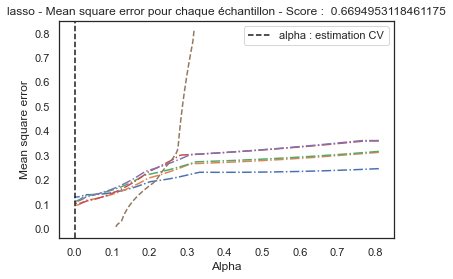



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  52.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


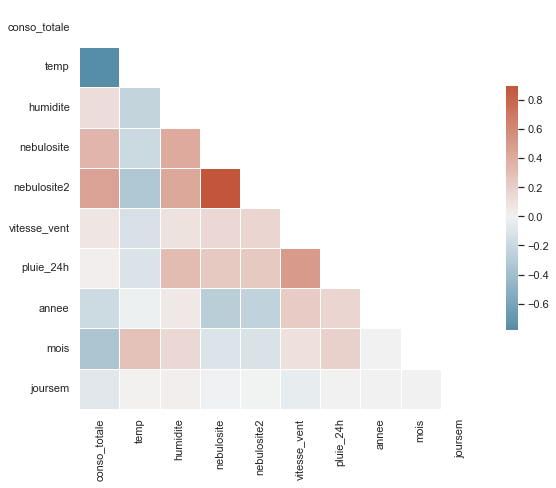

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8766      0.067709 -2.540224  1.770792    1.015001     0.916822     -2.052653   

      pluie_24h  annee  mois  joursem  
8766  -0.464738      0     1        3  
331
         rmse train : 0.20483541837241281
         rmse test :  0.20011504051200346
332
         rmse train : 0.3276094149758214
         rmse test :  0.3188430572563275
333
         rmse train : 0.3118884322956395
         rmse test :  0.2962567189423146
334
         rmse train : 0.29571672144382344
         rmse test :  0.2794049866653059
335
         rmse train : 0.3290468648898324
         rmse test :  0.31974796888585566
336
         rmse train : 0.3293786889210023
         rmse test :  0.3220653548714724
337
         rmse train : 0.3232409480564609
         rmse test :  0.3185044635528751
338
         rmse train : 0.30780308822582236
         rmse test :  0.30572518934881393
339
         rmse train : 0.3288808165892484
         rmse test

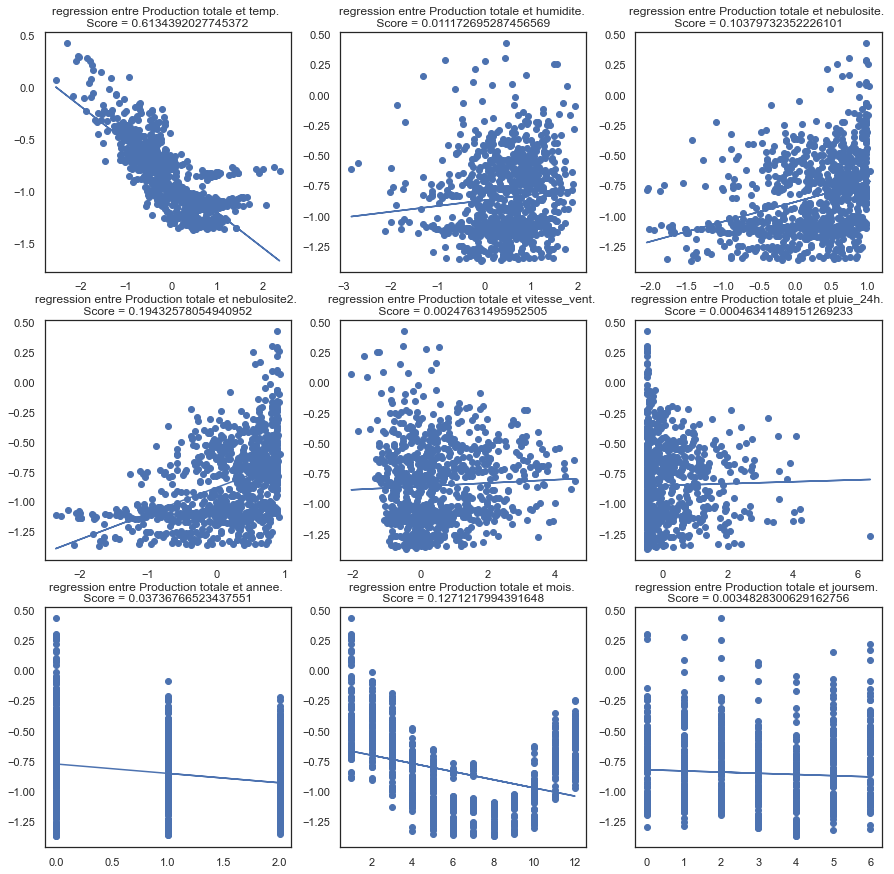

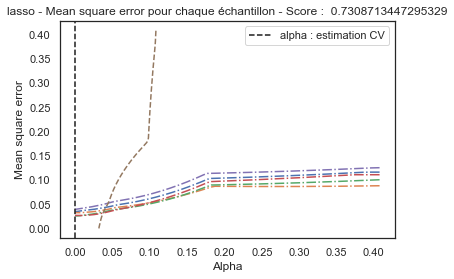



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  53.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


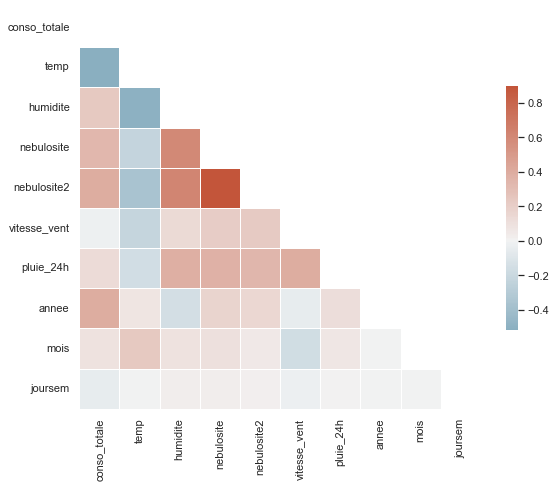

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8767     -0.373211 -1.600361  1.646824    0.429013     0.442033      -0.99562   

      pluie_24h  annee  mois  joursem  
8767   -0.46087      0     1        3  
331
         rmse train : 0.532973116048151
         rmse test :  0.5800302571378025
332
         rmse train : 0.6087125308182195
         rmse test :  0.6436149323031553
333
         rmse train : 0.5868793025171615
         rmse test :  0.6402522876200447
334
         rmse train : 0.5702105745955898
         rmse test :  0.6272742467077008
335
         rmse train : 0.6251764660159744
         rmse test :  0.6698326047654909
336
         rmse train : 0.6184326067380789
         rmse test :  0.6693242844075832
337
         rmse train : 0.5766519555564836
         rmse test :  0.6030112030542127
338
         rmse train : 0.6234547690180875
         rmse test :  0.6637225074813788
339
         rmse train : 0.6245067630131953
         rmse test :  0.6

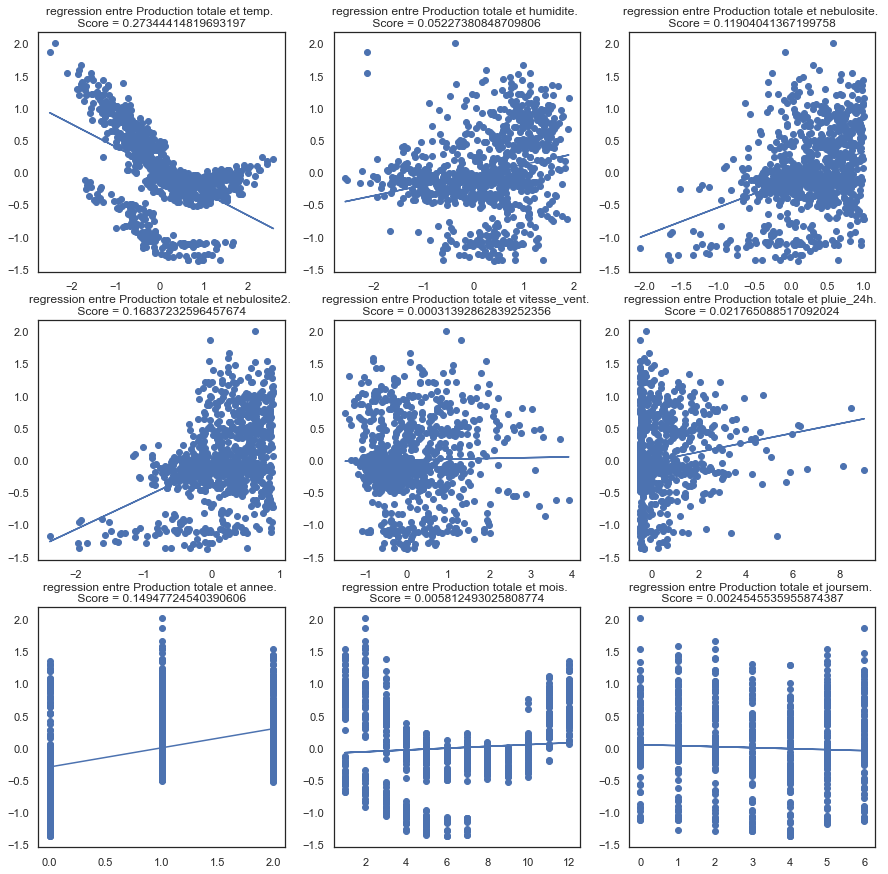

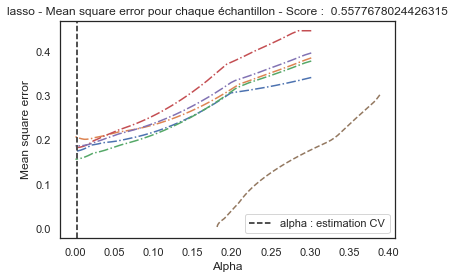



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  75.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


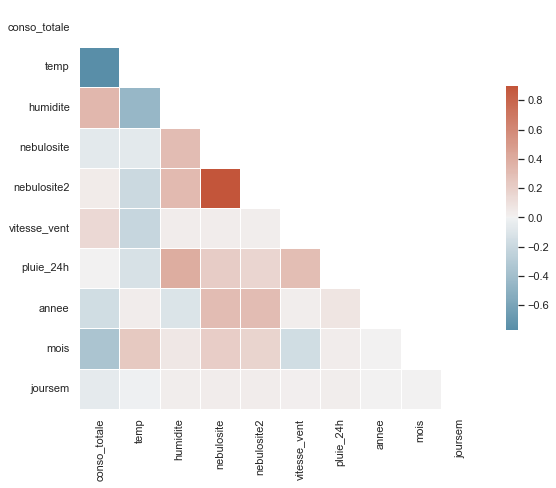

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8768      0.995949 -1.676325  1.401525     0.67986     0.902241     -1.246929   

      pluie_24h  annee  mois  joursem  
8768  -0.474406      0     1        3  
331
         rmse train : 0.30786689501031395
         rmse test :  0.32010330231369905
332
         rmse train : 0.45194272229880195
         rmse test :  0.4862648090209241
333
         rmse train : 0.4796026289691564
         rmse test :  0.5104936985603228
334
         rmse train : 0.4802081376057216
         rmse test :  0.5123293014684548
335
         rmse train : 0.47705299935813444
         rmse test :  0.5010463452665238
336
         rmse train : 0.4805981326566507
         rmse test :  0.512959986144331
337
         rmse train : 0.47358662499396115
         rmse test :  0.5070301459775105
338
         rmse train : 0.44635419905341045
         rmse test :  0.4876937035167083
339
         rmse train : 0.479856977539508
         rmse test :

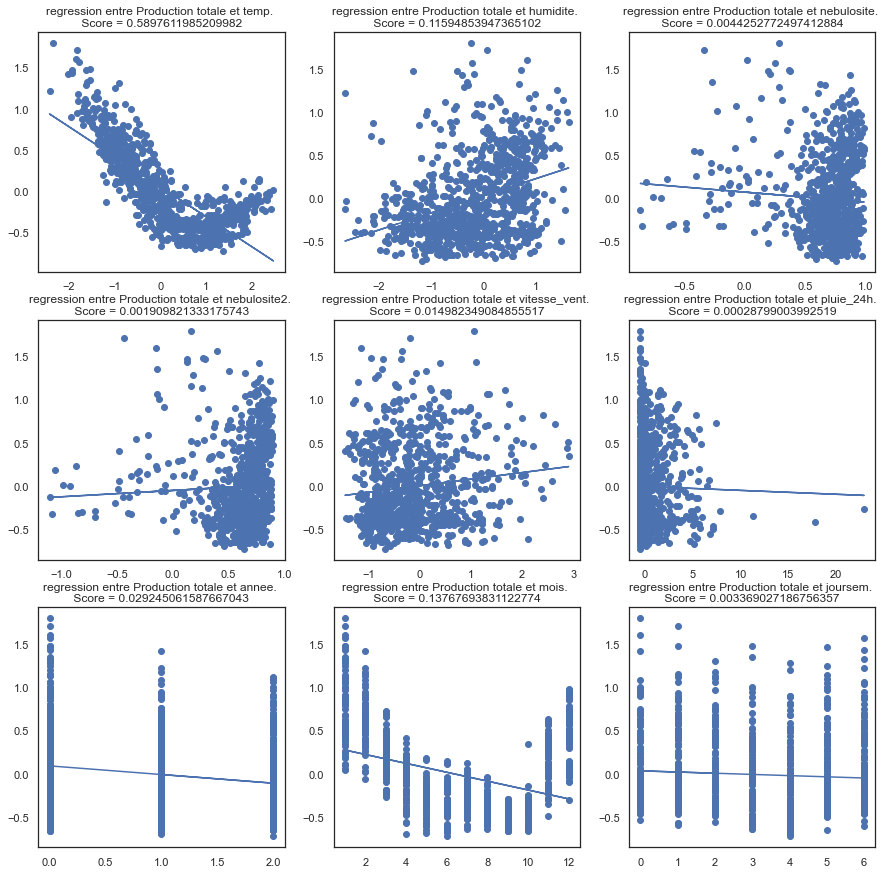

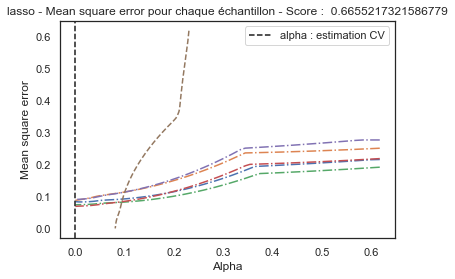



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  76.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


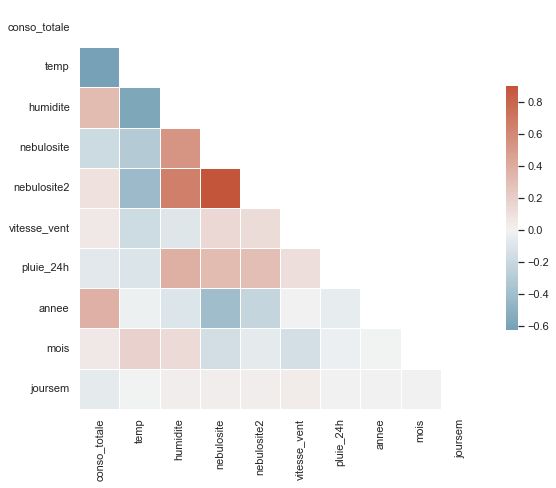

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8769      0.527839 -1.473846  0.910174     0.66319     0.587191     -1.317087   

      pluie_24h  annee  mois  joursem  
8769  -0.464738      0     1        3  
331
         rmse train : 0.6797377649758499
         rmse test :  0.6783769906759576
332
         rmse train : 0.8343817236306988
         rmse test :  0.7934428309739315
333
         rmse train : 0.8572844772104868
         rmse test :  0.8481125718119742
334
         rmse train : 0.8713409180650323
         rmse test :  0.8497822986023222
335
         rmse train : 0.8728068924984781
         rmse test :  0.8568735102367074
336
         rmse train : 0.871441507245152
         rmse test :  0.855558810327697
337
         rmse train : 0.8087973794702693
         rmse test :  0.8066514907979874
338
         rmse train : 0.8731298765671646
         rmse test :  0.8554423525339023
339
         rmse train : 0.8731554521841108
         rmse test :  0.85

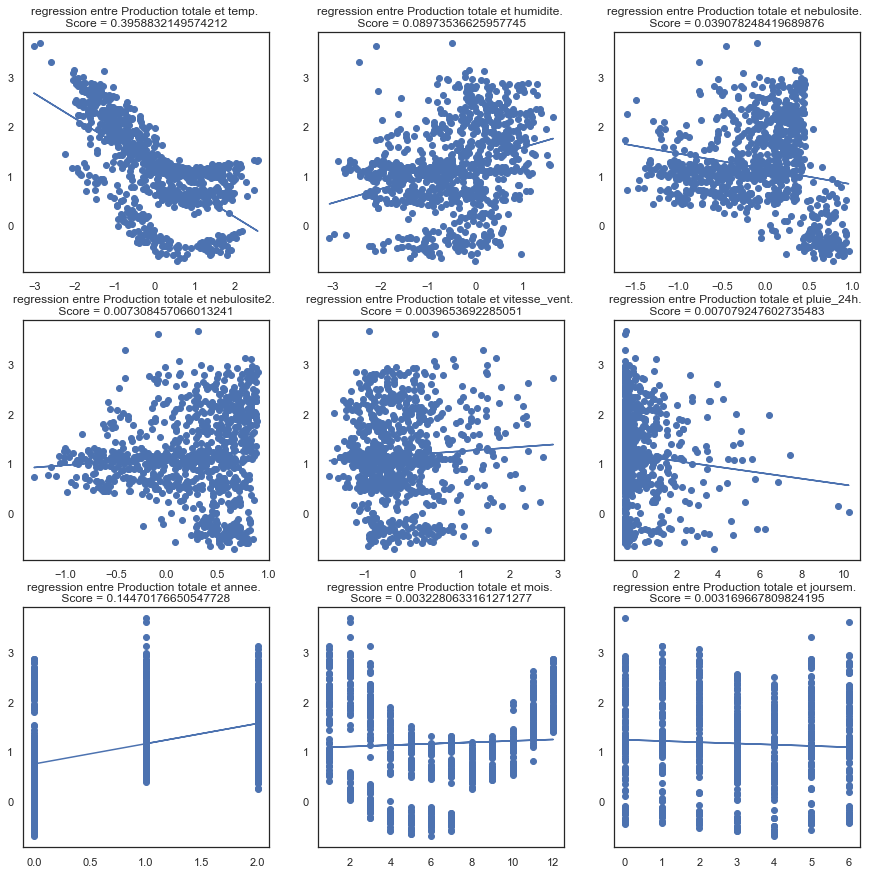

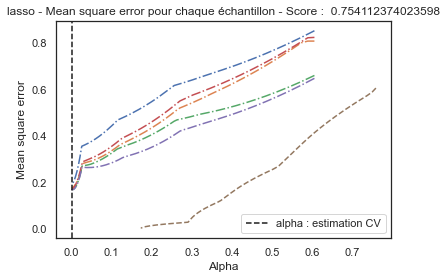



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  84.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


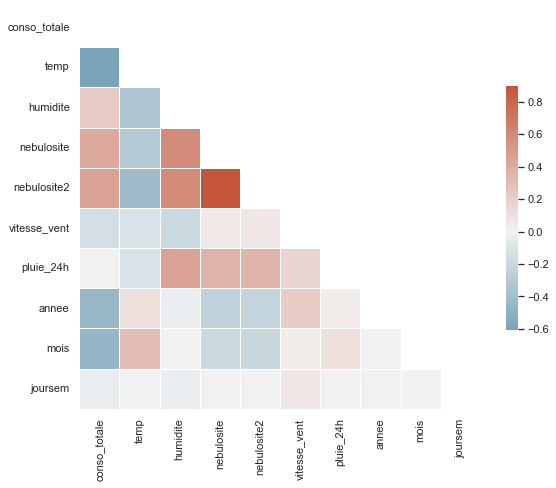

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8770      2.323597 -2.108081  1.485929    0.317922     0.896773     -1.319828   

      pluie_24h  annee  mois  joursem  
8770  -0.468605      0     1        3  
331
         rmse train : 0.603265116089085
         rmse test :  0.6053225054073508
332
         rmse train : 0.7286302554648139
         rmse test :  0.7916891166617215
333
         rmse train : 0.6748670933542125
         rmse test :  0.7509271803326559
334
         rmse train : 0.6630603641872667
         rmse test :  0.741052669317625
335
         rmse train : 0.7358519538816745
         rmse test :  0.8180145856739985
336
         rmse train : 0.7423148669637791
         rmse test :  0.8288566818648907
337
         rmse train : 0.6649050691832715
         rmse test :  0.7289015386032835
338
         rmse train : 0.6601654761299169
         rmse test :  0.7387961574824728
339
         rmse train : 0.7418153177709463
         rmse test :  0.82

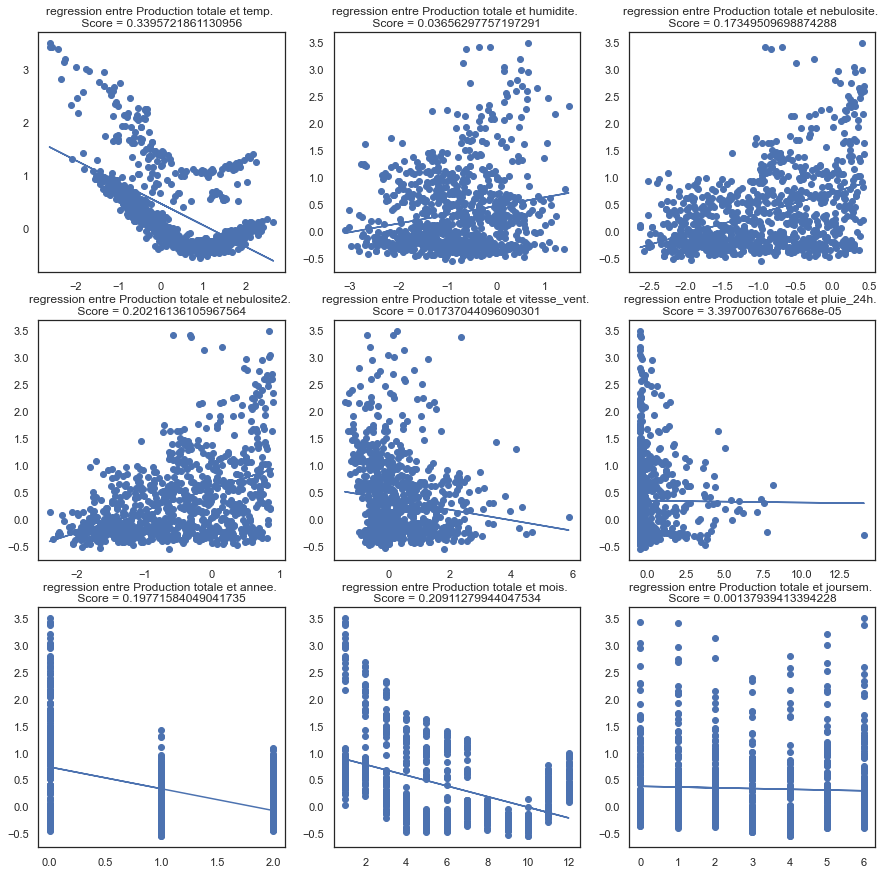

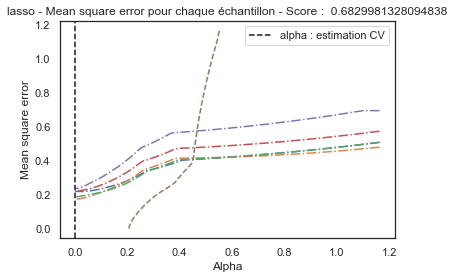



 |------------------------------------------------------------------------------------- | 
 |-------------------------------- REGION :  93.0 ------------------------------------ | 
 |------------------------------------------------------------------------------------- | 


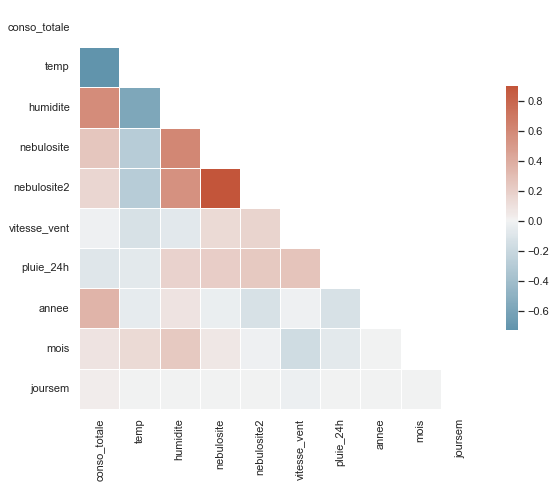

      conso_totale      temp  humidite  nebulosite  nebulosite2  vitesse_vent  \
8771      0.575742 -0.963288 -0.977611   -2.377112    -1.762405     -0.379816   

      pluie_24h  annee  mois  joursem  
8771   -0.46087      0     1        3  
331
         rmse train : 0.6901259628616064
         rmse test :  0.6474146964145251
332
         rmse train : 0.8116863204493695
         rmse test :  0.8034954001787112
333
         rmse train : 0.9706190549045264
         rmse test :  0.9354920990372695
334
         rmse train : 0.9888315954885424
         rmse test :  0.9559568522813991
335
         rmse train : 1.0000896565198412
         rmse test :  0.9750987909741622
336
         rmse train : 0.9949747963931033
         rmse test :  0.9753755840609123
337
         rmse train : 0.9335973215203343
         rmse test :  0.9189953294389919
338
         rmse train : 0.9968770507389259
         rmse test :  0.9711072846125952
339
         rmse train : 0.9998457322942579
         rmse test :  0.

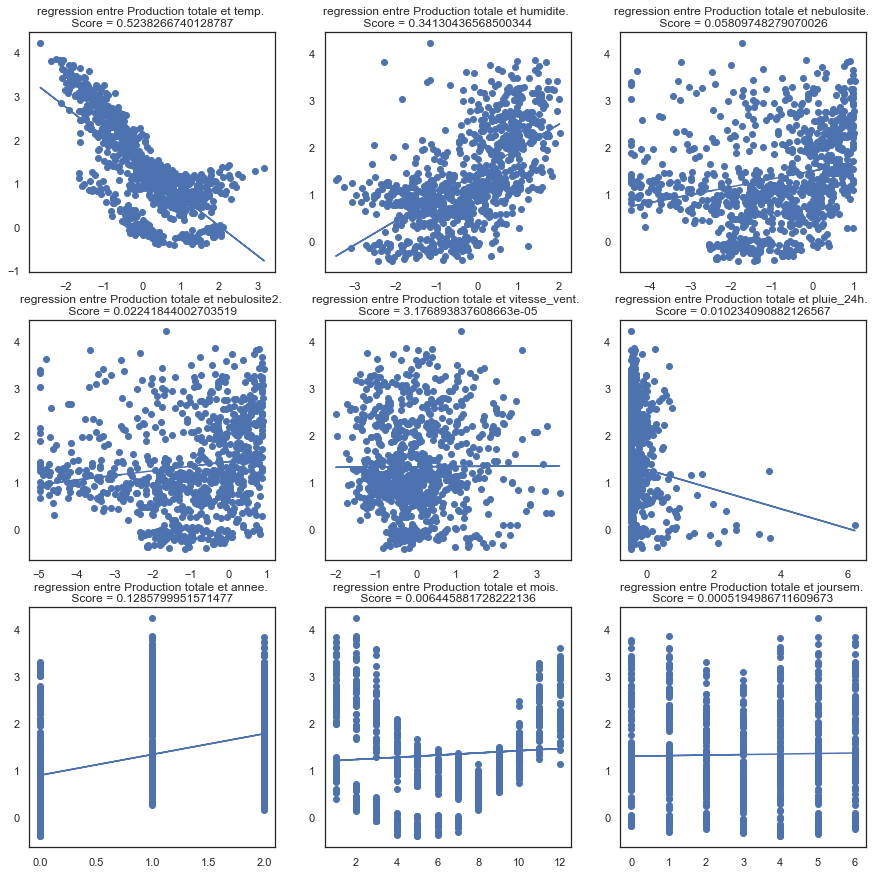

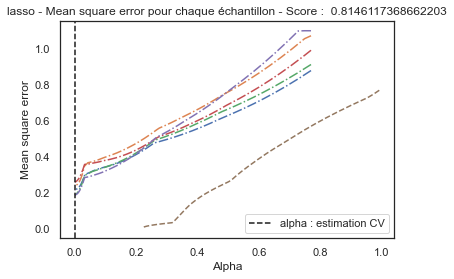

In [45]:
#  Paramètrage des   boucle 
lr = LinearRegression()

for num_region in df_region['region'].unique(): 

# for num_region in[11,24]: 
    nb_trace='1'
 
    reg = df_region[df_region['region'] == num_region]
    reg = reg.drop ('region',axis = 1)
    print ( '\n\n |------------------------------------------------------------------------------------- | ')
    print ( ' |-------------------------------- REGION : ',num_region ,'------------------------------------ | ')
    print ( ' |------------------------------------------------------------------------------------- | ')
    
    #     Affichage de la matrice de correlation 
   
    dataviz_corr(reg) 
    plt.show();
    #    Calcul du set de train et du set d'entraitement 
    print (reg.head(1))
    # features = reg.drop (['conso_totale','annee','mois','joursem'],axis = 1) 
    features = reg.drop (['conso_totale'],axis = 1)
    target = reg['conso_totale']
    

    X_train , X_test, y_train,y_test = train_test_split (features,  target, test_size = 0.2) 
    
    
    #    Suppression des variables inutiles 
    # X_train_sel, X_test_sel, Liste_variables =  suppression_variance_nulle (X_train,X_test) 

    # Dataviz analyse des infos par rapport à la variable cible       
    fig = plt.figure(figsize = (15,15))
    
    for variable in X_train: 
        # print (f"==================>  regression entre Production totale et {variable} ")
       
        lr.fit(X_train[[variable]],y_train) 
        chaine = '33' +   nb_trace
        print (chaine)  
        plt.subplot (int(chaine)) 
        nb_trace = str(int(nb_trace)+1)
       
                 
        plt.title (f"regression entre Production totale et {variable}. \n Score = {lr.score (X_train[[variable]],y_train)} ") 
        plt.scatter(X_train[[variable]],y_train)
        plt.plot(X_train[[variable]],lr.coef_*X_train[[variable]]+lr.intercept_)
      
        pred_train = lr.predict (X_train[[variable]])
        pred_test =  lr.predict(X_test[[variable]])
    
        print('         rmse train :', np.sqrt(mean_squared_error(y_train, pred_train)))
        print('         rmse test : ', np.sqrt(mean_squared_error(y_test, pred_test)))
        
        
    # Régression avec toutes les variables - Lasso 
   
    plt.show()
    model_lasso = LassoCV ( cv= 5,n_alphas = 250)
    model_lasso.fit (X_train,y_train)

    alphas = model_lasso.alphas_ 
    plt.title (f"lasso - Mean square error pour chaque échantillon - Score :  { model_lasso.score(X_test,y_test) }")
    plt.plot (alphas,model_lasso.mse_path_ ,'-.')
    plt.plot (model_lasso.mse_path_.mean(axis=1), alphas, '--')
    plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')

    plt.xlabel('Alpha')
    plt.ylabel('Mean square error')
    plt.legend();
    plt.show()
